# TP Pobabilités Numériques - Stats Computationnelles
## Paul LE FRANC - Emilio PICARD

## Inférence variationnelle

## Sujet : Application d'une approche variationnelle pour un modèle de régression bayésien

#### Modèle :

On considère un modèle de régression linéaire, de la forme $y = \beta^T x + \epsilon$, avec $y = (y_i)_{i=1,...,n} \in \mathbb{R}^n$ , $x = (x_i)_{i=1,...,n} \in \mathbb{R}^n$ x $\mathbb{R}^D,  x_i \in \mathbb{R}^D$ , et $(\epsilon_i)_{i=1,...,n} \sim \mathcal{N}(0,1)$.

La variable latente $\beta \in \mathbb{R}^D$ est le vecteur des coefficients de régression, que nous allons au passage estimer dans ce travail.

On supposera dans ce travail que la loi de $y$ s'écrit :
$$
p( y \vert \beta,\tau ; x) = \prod_{i=1}^{n} \phi_{\mathcal{N}(\beta^T x_i,\tau)}(y_i),
$$
où $\phi_{\mathcal{N}(\beta^T x_i,\tau)}$ est la densité d'une loi normale de moyenne $\beta^Tx_i$ et de paramètre de précision $\tau_i = \frac{1}{\sigma_i^2}, \sigma^2$ étant la variance, $\tau \in \mathbb{R}^n$.

Pour faciliter les notations, nous noterons $\phi_{\mathcal{N}(\mu,\tau)}(z) = \mathcal{N}(z \vert \mu,\tau).$

Le cadre de notre étude repose sur du Bayésien hiérarchique, c'est à dire que la loi a priori de $(\beta,\tau)$ $\mathcal{L}(\beta,\tau)$ est conditionnée par rapport à une autre variable $\alpha$, elle même aléatoire suivant une certaine loi. On a donc :

$$
p(\beta,\tau \vert \alpha) = \mathcal{N}(\beta \vert 0, \tau diag (\alpha)) \Gamma(\tau \vert a_0, b_0),
$$
où $\alpha$ est un vecteur de dimension D, aléatoire, tel que :
$$
p(\alpha) = \prod_{d=1}^D \Gamma (\alpha_d \vert c_0, d_0),
$$
$a_0, b_0, c_0$ et $d_0$ fixés, appelés Hyper-paramètres.

#### Importation des bibliothèques qui vont être utilisées 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import gamma

#### Problème et Solution :

Notre objectif est d'approcher $p(\beta,\tau \vert y;x)$, densité a posteriori du modèle, car nous ne pouvons pas la calculer directement. Posons $z =(\beta,\tau)$.

On propose une famille de densités candidates pour approcher $(z,\alpha) \mapsto p(z,\alpha \vert y;x) $. On introduit alors $\mathcal{D} = \{ (z,\alpha) \mapsto q(z,\alpha) = q(z)q(\alpha) \} $, la famille de densités en question.

D'après le cours les densités $q_j$ optimales sont:
$$
q_j(z_j) \propto \exp \{ \mathbb{E}_{-j} [ \log p(z_j, z_{-j}, y,x) ] \},
$$
où les $z_j$ sont $z$ et $\alpha$.

#### Construction de l'algorithme de CAVI :

Commençons, graçe à la formule ci-dessus, par trouver la forme optimale de $q(z) = q(\beta, \tau)$:

\begin{align*}
\log p( \beta ,\tau, \alpha, x, y) &= \log p( y \vert \beta, \tau, \alpha ) + \log p(\beta, \tau, \alpha) \\
&= \log p(y \vert \beta, \tau, x ) + \log p( \beta,\tau \vert \alpha ) + \log p(\alpha)
\end{align*}

D'où :

\begin{align}
\log q^*(\beta, \tau) &= \mathbb{E}_{\alpha} [ \log p(y \vert \beta, \tau, x) + \log p(\beta, \tau \vert \alpha)] + cste \\
&= \log p(y \vert \beta, \tau, x) + \mathbb{E}_{\alpha} [\log p(\beta, \tau \vert \alpha)] + cste \\
&= \log \{ \prod_i \mathcal{N}(y_i \vert \beta^T x_i,\tau) \} + \mathbb{E}_{\alpha} [\log p(\beta, \tau \vert \alpha)] + cste
\end{align}

Calculons d'abord $\log \{ \prod_i \mathcal{N}(y_i \vert \beta^T x_i,\tau) \}$:

\begin{align}
\log \{ \prod_i \mathcal{N}(y_i \vert \beta^T x_i,\tau) \} &= \sum_i \log \frac{\tau^{1/2}}{\sqrt{2\pi}} \exp ( -\frac{\tau}{2} (y_i - \beta^Tx_i)^2) \\
&= \frac{n}{2} \log \tau - \frac{\tau}{2} \sum_i (y_i - \beta^T x_i)^2 + cste \\ 
&= \frac{n}{2} \log \tau - \frac{\tau}{2} \sum_i y_i^2 + \frac{\tau}{2}2\beta^T \sum_i x_i y_i - \frac{\tau}{2} \beta^T \sum_i x_i x_i^T \beta + cste. 
\end{align}

Continuons avec le terme $\mathbb{E}_{\alpha} [\log p(\beta, \tau \vert \alpha)]$ :

\begin{align}
\mathbb{E}_{\alpha} [\log p(\beta, \tau \vert \alpha)] \propto \mathbb{E}_{\alpha} [\frac{D}{2} \log \tau - \frac{1}{2} \beta^T \tau diag(\alpha) \beta - b_0 \tau + (a_0 -1)\log\tau] \\
\propto \frac{D}{2} \log \tau - \frac{\beta^T}{2} \tau \mathbb{E}_{\alpha}[diag(\alpha)] \beta - b_0 \tau + (a_0 - 1) \log \tau.
\end{align}

Finalement, on obtient:

\begin{align}
\log q^* (\beta, \tau) \propto \log \tau  \big(\frac{D}{2} + a_0 - 1 + \frac{n}{2}\big) - \frac{\tau}{2} \bigg( \sum_i y_i^2 - 2 \beta^T \sum_ix_iy_i + \beta^T\sum_ix_ix_i^T\beta + 2b_0 + \beta^T \mathbb{E}_{\alpha} [diag(\alpha)]\beta \bigg). 
\end{align}

Et en posant

\begin{align}
V_*^{-1} &= \mathbb{E}_{\alpha}[diag(\alpha)] + \sum_ix_ix_i^T \, , \\
\beta_* &= V_*\sum_ix_iy_i \,, \\
a_* &= a_0 + \frac{n}{2} \,, \\
b_* &= b_0 + \frac{1}{2} ( \sum_iy_i^2 - \beta_*^T V_*^{-1} \beta_* )
\end{align}

on arrive à nos fins :

$$
\log q^*(\beta, \tau) \propto \log \mathcal{N}(\beta \vert \beta_*, \tau V_*^{-1}) + \log \Gamma( \tau \vert a_*, b_* ),
$$
ie
<font color=darkred>
$$
\boxed{q^*(\beta, \tau) \propto \mathcal{N}(\beta \vert \beta_*, \tau V_*^{-1}) \Gamma( \tau \vert a_*, b_* )}.
$$
</font>

Grâce à des calculs similaires, nous pouvons donner la forme optimale de $q(\tau)$.

On pose 
$$
q(\alpha) = \prod_{d=1}^D q(\alpha_d). 
$$

On trouve alors : 

<font color=darkred>

$$
\boxed{q^*(\alpha) \propto \Gamma( \alpha_d \vert c_*, d_{*d} )},
$$

</font>

avec $c_* = c_0 + \frac{D}{2}$  et   $d_{*d} = d_0 + \frac{1}{2}\mathbb{E}_{\beta,\tau}[\tau \beta_d^2]$.

Pour finir, afin de pouvoir coder l'algorithme CAVI, nous implémenterons les Espérances par :
\begin{align}
\mathbb{E}_{\alpha}[diag(\alpha)] &= c_* diag(1/d_*) \,, \\
\mathbb{E}_{\beta,\tau}[\tau\beta_d^2] &= \beta_{*d}^2a_*/b_* + [V_*]_d,
\end{align}
où $[.]_d$ est la d-ième valeur sur la diagonale d'une matrice.

#### Mise à jour de $\beta$ et $\tau$ avec CAVI :

In [2]:
def CAVI_update_V_(X,c,d):
    """
    Inputs :
    -------
    X same as above
    c : previous value, real
    d : previous value, D-dimensional vector
    
    Outputs :
    -------
    V_ : new estimation of V_, real
    
    """
    
    return c*np.diag(1/d) + X.T@X

In [3]:
def CAVI_update_beta(X,Y,V_): #renvoie la mise à jour de beta
    """
    Inputs :
    -----
    X n.D-dimensional matrix
    Y : data, n-dimensional vector
    V_ : (D,D)-dimensional matrix, new estimation of V_
    
    Outputs :
    -----
    beta : D-dimensional vector, new estimation of beta
    """
    
    num = X.T@Y
    
    return np.linalg.inv(V_)@num    

In [4]:
def CAVI_update_b(Y,b,beta,V_): #renvoit la mise à jour des paramètres pour tau
    
    """
    Inputs :
    -----
    Y, V_ same as algorithm above 
    b : current estimation of b, real
    beta : new estimation of beta
    
    Outputs :
    ------
    b : new estimation of b, 1-dimensional vector
    
    """

    b_new = b + 1/2*(np.sum(Y**2) - (beta.T @ V_ @ beta) )
        
    return b_new

#### Mise à jour des $\alpha$ avec CAVI :

In [5]:
def CAVI_update_d(X, Y, d, beta, a, b, V_):
    """
    Inputs :
    --------
    X,Y as above
    d, a, b, V_, beta : current estimation, before the CAVI_update
    
    Outputs :
    ------
    d : new estimation of d, D-dimensional vector
    
    """
    d_new = d + 1/2*(a/b*beta.T@beta + np.sum(np.diag(np.linalg.inv(V_))))
    
    return d_new

Pour la ELBO, après beaucoup de questionnement sur la manière de caluculer $\mathbb{E}[\log X]$, $X$ suit une $\Gamma(a,b)$ nous avons trouvé une alternative, et allons utiliser la fonction Di-Gamma, définie comme suit :
$$
\psi(z) = \frac{\Gamma(z)^{'}}{\Gamma(z)}
$$



In [6]:
from scipy.special import psi

Grâce à celle-ci, nous allons pouvoir exprimer $\mathbb{E}_q[\log\tau]$, si  $\tau \sim \Gamma(a,b) $ :


\begin{align}
\mathbb{E}_q[\log\tau] &= \int_0^{\infty} \frac{\log(\tau)}{\Gamma(a)}b^a\tau^{a-1}e^{-b\tau}d\tau,\, \text{on pose alors} \,\, y = b\tau : \\
&= \int_0^{\infty} \frac{\log(y/b)}{\Gamma(a)}y^{a-1}(1/b)^{a-1}e^{-y}dy \\
&= \int_0^{\infty} \frac{\log(y)}{\Gamma(a)}y^{a-1}e^{-y}dy  - \log b \\
&= \psi(a) - \log b,
\end{align}
avec $\psi(a)$ la fonction Di-Gamma.


Maintenant que tout cela est clair, calculons la ELBO :

\begin{align}
\text{ELBO}(q) &= -\mathbb{E}_q[\log q(\beta, \tau,\alpha)] + \mathbb{E}_q[ \log p(\beta, \tau, \alpha, y)] \\
&= \mathbb{E}_q[\log p(y \vert \beta, \tau)] \,(1) + \mathbb{E}_q[\log p(\beta,\tau \vert \alpha)] \,(2) + \mathbb{E}_q[ \log p(\alpha)] \,(3) - \mathbb{E}_q[\log q(\beta,\tau)] \,(4) - \mathbb{E}_q[\log q(\alpha)] \,(5)
\end{align}

\begin{align}
\text{(1) :}\,\,\,\mathbb{E}_q[\log p(y\vert \beta, \tau)] &= \mathbb{E}_q\big[-\frac{n}{2} \log 2\pi + \frac{n}{2}\log \tau - \frac{\tau}{2} \sum_{i=1}^n (y_i - \beta^Tx_i)^2 \big] \\
&= \frac{n}{2}(-\log 2\pi + \psi(a) -\log b) -\frac{a_*}{2b_*}\mathbb{E}_q\big[\sum_{i=1}^n (y_i - \beta^Tx_i)^2\big] \\
&= \frac{n}{2}(-\log 2\pi + \psi(a) -\log b) - \frac{1}{2}\bigg(\sum_i \frac{a_*}{b_*}(y_i-\beta^Tx_i)^2 + x_i^T V_* x_i\bigg)
\end{align}

\begin{align}
\text{(5) :} \,\,\, \mathbb{E}_q[\log q(\alpha)] &= \mathbb{E}_q\big[(c_*-1)\log \alpha - \alpha d_* +\log d_* - \log \Gamma(c_*)\big] \\
&= - \log \Gamma(c_*) + c_* \log d_* + (c_* - 1) \big( \psi(c_*) - \log d_* \big) - d_* \frac{c_*}{d_*} \\
&= -\log \Gamma(c_*) + \log d_* - c_* + (c_* - 1)\psi(c_*)
\end{align}

\begin{align}
\text{(4) :} \,\,\, \mathbb{E}_q [\log q(\beta, \tau)] &= \mathbb{E}_q \bigg[\log \big( \frac{ \tau^{D/2} }{ (2 \pi)^{D/2} \vert V_* \vert^{1/2} } \big) - \frac{1}{2} (\beta - \beta_*)^T \tau V_*^{-1} (\beta - \beta_*) + (a_* - 1)\log \tau + a_*\log b_* - \log \Gamma(a_*) - b_* \tau \bigg] \\
&= -\frac{D}{2}\log 2\pi + \frac{D}{2}(\psi(a_*) -\log b_*) - 1/2 \log \vert V_* \vert - \frac{D}{2}  + (a_*-1)(\psi(a_*)-\log b_*) + a_* \log b_* - \log \Gamma(a_*) - a_*,
\end{align},

où le terme  $-\frac{D}{2}$ seul vient du terme $\mathbb{E}_q [-1/2 (\beta-\beta_*)^T \tau V_*^{-1} (\beta-\beta_*)]$.

De la même manière, nous calculons (2) et (3), et nous obtenons :
$$ 
(2) : \, \mathbb{E}_q[ \log  p(\beta, \tau \vert \alpha)] = \frac{D}{2} \big( \psi(a_*) - \log b_* + \psi(c_*) - \log d_* - \log 2\pi \big) - \frac{c_*}{2c_*}(\frac{a_*}{b_*}\beta_*^T \beta_* + Tr(V_*)) - \log \Gamma(a_0) + a_0 \log b_0 + (a_0 - 1)( \psi(a_*) - \log b_* ) - b_0\frac{a_*}{b_*} 
$$
$$
(3) : \, \mathbb{E}_q[ \log p(\alpha)] = - \log \Gamma(c_0) + d_0 \log c_0 +(c_0 -1)( \psi(c_*) - \log d_*) - d_0 \frac{c_*}{d_*}
$$

.

On obtient la ELBO en combinant ces 5 résultats. Cela donne :
\begin{align}
\text{ELBO}(q) = - &\frac{n}{2} \log 2\pi - \frac{1}{2} \sum_{i=1}^n \bigg( \frac{a_*}{b_*} (y_i - \beta_*^T x_i)^2 + x_i^T V_* x_i \bigg) + \frac{1}{2} \log \vert V_* \vert + \frac{D}{2} \\
&- \log \Gamma(a_0) + a_0 \log b_0 - b_0 \frac{a_*}{b_*} + \log \Gamma(a_*) - a_* \log b_* + a_* \\
&- \log \Gamma(c_0) + c_0 \log d_0 + \log \Gamma(c_*) - c_* \log d_*
\end{align}

Nous pouvons maintenant coder une itération de la ELBO. En effet, le but de ce travail va être de tracer la convergence de la ELBO en fonction des itérations.

In [7]:
bet=np.random.randint(-4,4,size=(3,))
X=np.random.randint(-4,4,size=(2,3))
y=np.random.randint(-4,4,size=(2,))
print(y-X@bet,'\n')
print(y[1]-bet.T@X[1,:],'\n')
#print(b[0,:]@u)
#print(X,'\n',X[1,:])



[11 12] 

12 



In [8]:
def ELBO(Y,X,a0,b0,c0,d0,a_1,b_1,c_1,d_1,V_,beta):
    Y = Y.reshape(-1,1)
    
    n = Y.shape[0]
    D = beta.shape[0]
    bulle=0
    for k in range(n):
        bulle+= a_1/b_1*(Y[k] - beta@X[k,:].T)**2 
    #   +  X[i,:]@np.linalg.inv(V_)@X[i,:].T 
    #
    first_term = -n/2*np.log(2*np.pi)  - 1/2*(bulle+np.sum(X@np.linalg.inv(V_)*X)) + 1/2*np.log(np.linalg.det(np.linalg.inv(V_))) + D/2
    
    #second_term = -np.log(gamma(min(a0,170))) + a0*np.log(b0) - b0*a_1/b_1 + np.log(gamma(min(a_1,170))) - a_1*np.log(b_1) + a_1
    #print(a_1)
    second_term = np.log(gamma(a_1))-np.log(gamma(a0)) + a0*np.log(b0) - b0*a_1/b_1  - a_1*np.log(b_1) + a_1
    #print(second_term)
    
    
    third_term = - np.log(gamma(c0)) + c0*np.log(d0[0]) + np.log(gamma(c_1)) - c_1*np.log(d_1[0])
    
    return first_term + second_term + third_term

In [9]:
def ELBO2(Y,X,a0,b0,c0,d0,a_1,b_1,c_1,d_1,V_,beta):
    Y = Y.reshape(-1,1)
    
    n = Y.shape[0]
    D = beta.shape[0]

    first_term = -n/2*np.log(2*np.pi)  - 1/2*(np.sum((Y-X@beta)**2)+np.sum(X@np.linalg.inv(V_)*X)) + 1/2*np.log(np.linalg.det(np.linalg.inv(V_))) + D/2
    

    second_term = np.log(gamma(a_1))-np.log(gamma(a0)) + a0*np.log(b0) - b0*a_1/b_1  - a_1*np.log(b_1) + a_1

    
    
    third_term = - np.log(gamma(c0)) + c0*np.log(d0[0]) + np.log(gamma(c_1)) - c_1*np.log(d_1[0])
    
    return first_term + second_term + third_term

Maintenant que toutes les mises à jours sont implémentées, il ne reste plus qu'à implémenter un algo comprenant toutes les mises à jours :

In [36]:
def CAVI_complet(X, Y, a0, b0, c0, d0, max_iter = 500, eps = 1e-8):
    """
    Inputs :
    -------
    a, b, c, d : Hyper-parameters of our model
    beta : D-dimensional vector, initial value
    V_ : (D,D)-dimentional matrix, initial estimation value
    X : (n,D)-dimentional matrix,
    Y : data, n-dimensional vector
    
    Outputs:
    -------
    ELBO, a, b, c, d, beta, V_ : all the value for each iteration
    
    """
    
    iter = 0
    
    n = Y.shape[0]
    D = X.shape[1]
    
    B, Dd, Beta = [], [], []
    
    V_ = CAVI_update_V_(X, c0, d0)
    
    beta = CAVI_update_beta(X, Y, V_)
    Beta.append(beta)
    
    b = CAVI_update_b(Y, b0, beta, V_)
    a=a0+n/2
    
    B.append(b)
    
    d = CAVI_update_d(X, Y, d0, beta, a, b, V_)
    c=c0+D/2
    
    Dd.append(d)
    
    ELBOS = [ELBO(Y,X,a0,b0,c0,d0,a,b,c,d,V_,beta)]
    TEST=[ELBO(Y,X,a0,b0,c0,d0,a,b,c,d,V_,beta)==ELBO2(Y,X,a0,b0,c0,d0,a,b,c,d,V_,beta)]
    iter = 0
    
    while iter < max_iter :
        #Vtrans=V_
        V_ = CAVI_update_V_(X, c, d)
    
        beta = CAVI_update_beta(X, Y, V_)
        Beta.append(beta)
    
        b = CAVI_update_b(Y, b0, beta, V_)
        
        B.append(b)
    
        d = CAVI_update_d(X, Y, d0, beta, a, b, V_)
        
        Dd.append(d)
        
        ELBOS.append(ELBO(Y,X,a0, b0, c0, d0, a, b, c, d, V_, beta))
        TEST.append(ELBO(Y,X,a0, b0, c0, d0, a, b, c, d, V_, beta)==ELBO2(Y,X,a0, b0, c0, d0, a, b, c, d, V_, beta))
        iter = iter + 1
        
        if np.abs(ELBOS[-2]-ELBOS[-1]) <= eps:
            break

    return ELBOS, Beta, a, np.array(B)[np.array(B)<=0], c, np.array(Dd)[np.array(Dd)<=0], V_, TEST

In [42]:
n, D = 300, 3

a0, b0, c0, d0 = 10**(-2), 10**(-4), 10**(-2), np.array([10**(-4) for k in range(D)])
alpha=stats.gamma.rvs(c0,scale=1/d0[0],size=D)

tau=stats.gamma.rvs(a0,scale=1/b0)


BET = stats.multivariate_normal.rvs(cov=(1/tau)*np.diag(1/alpha))
bet=np.array([0.1,0.2,0.8])
X = 0.7*np.random.rand(n,D) + 2

Y=np.zeros(n)
for i in range(n):
    
    Y[i] = stats.norm.rvs(bet@X[i,:],1/tau)
bet

array([0.1, 0.2, 0.8])

In [43]:
elbos,beta,a,b,c,d,V,test= CAVI_complet(X, Y, a0, b0, c0, d0, max_iter = 500, eps = 1e-8)
beta = np.array(beta)

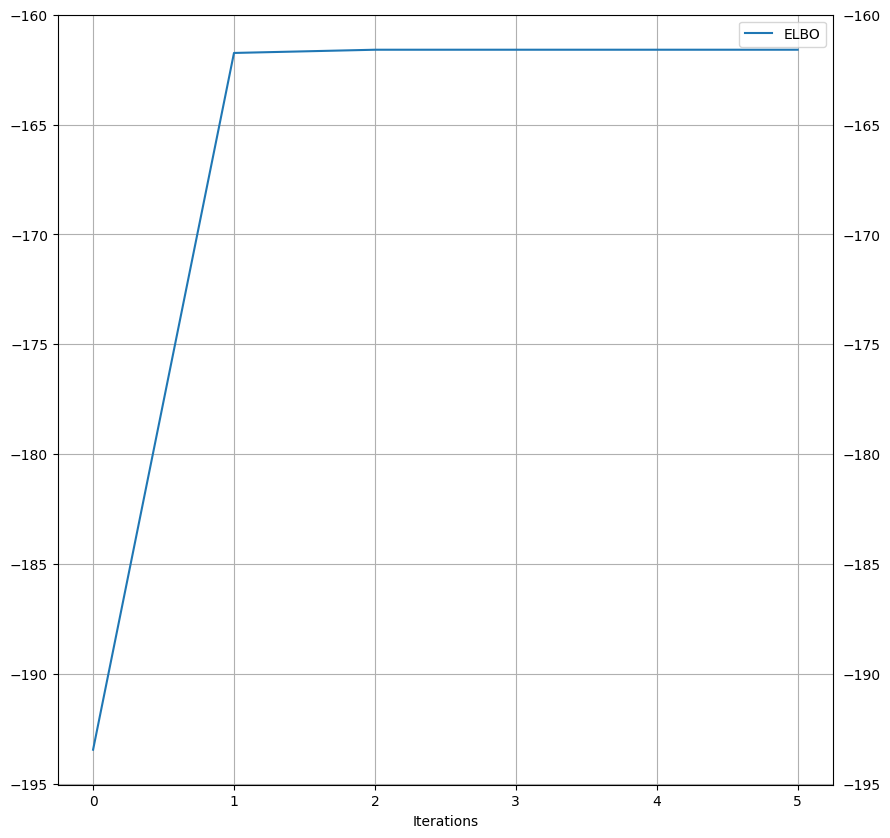

In [44]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.array(elbos),label = 'ELBO')
plt.tick_params(labelright=True)
plt.grid(True)
plt.xlabel('Iterations')
plt.legend();

Convergence de l'estimateur $\beta_{*}$ :

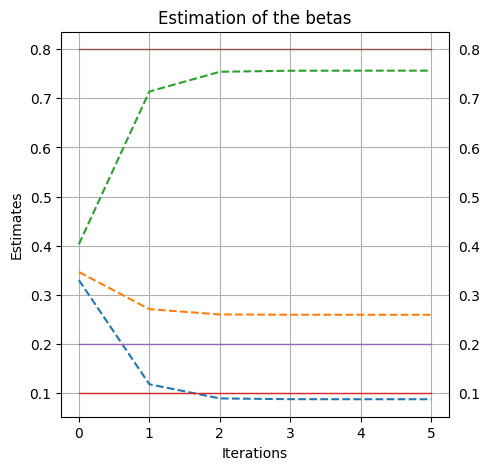

In [45]:
nb_iter = np.array(elbos).size # number of iterations before stopping criterion
fig = plt.figure(figsize=(5,5))
plt.plot(beta, '--')
plt.plot(np.arange(nb_iter),bet[0]*np.ones(nb_iter), linewidth=1, label = 'True mean of the cluster 0')
plt.plot(np.arange(nb_iter),bet[1]*np.ones(nb_iter), linewidth=1, label = 'True mean of the cluster 1')
plt.plot(np.arange(nb_iter),bet[2]*np.ones(nb_iter), linewidth=1, label = 'True mean of the cluster 2')
plt.tick_params(labelright=True)
plt.grid(True)
plt.ylabel('Estimates')
plt.xlabel('Iterations')
plt.title('Estimation of the betas');

Nous rencontrons un problème. Dans le calcul de l'ELBO, nous avons besoin de la fonction $\Gamma$ qui va rapidement ne plus pouvoir renvoyer de valeurs, car trop grandes. Par conséquent, nous ne pouvons pas avoir un critère d'arrêt optimal.
Changeons donc notre modèle, et prenons $D=1$. Nous sommes donc en dimension 1, avec un modèle de la forme $Y = X^T\beta + \epsilon$ , où $\beta$ est un réel. 

In [53]:
#Nouveau modèle pour optimiser la méthode
n=4
bet = np.array([4,2])
X = 2*np.random.randn(n,2) + 0.5
Y = X@bet + np.random.randn(n)
d0 = np.array([10**(-4),10**(-4)])

In [54]:
elbos, BETA, _, _, _, _, _, _ = CAVI_complet(X, Y, a0, b0, c0, d0, max_iter = 500, eps = 0.3)

ValueError: operands could not be broadcast together with shapes (10,) (2,2) 

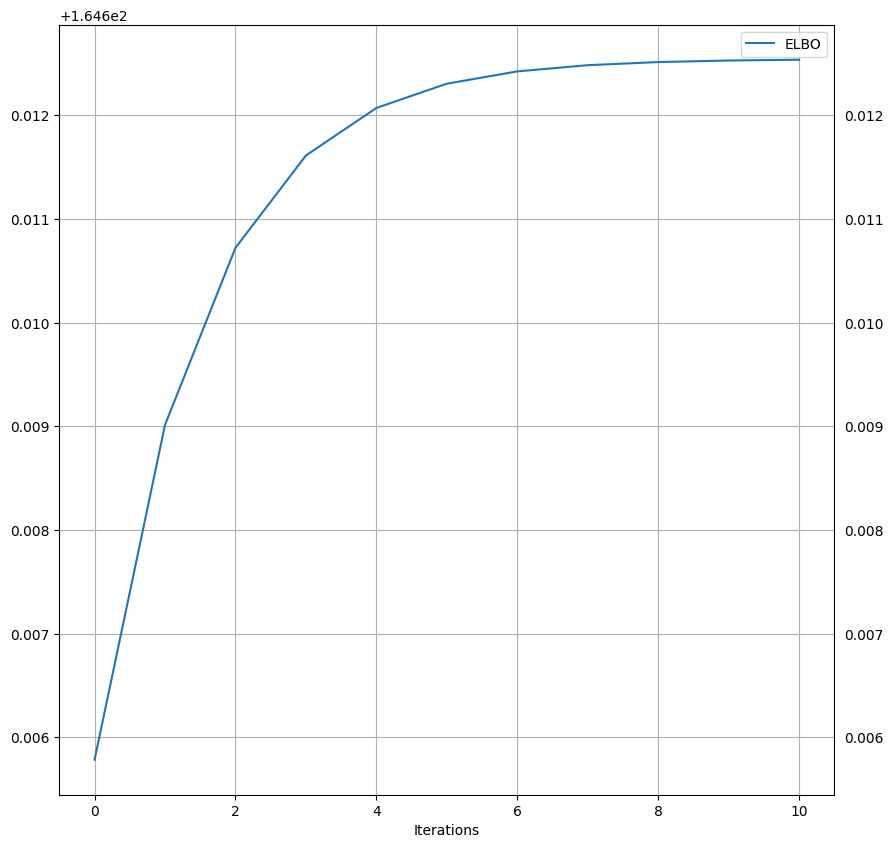

In [55]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.array(elbos),label = 'ELBO')
plt.tick_params(labelright=True)
plt.grid(True)
plt.xlabel('Iterations')
plt.legend();

In [56]:
n, D = 100, 3

a0, b0, c0, d0 = np.linspace(10**(-2),1,10), np.linspace(10**(-4),1,10), np.linspace(10**(-2),1,10), np.array([10**(-4) for k in range(D)])
alpha=stats.gamma.rvs(0.08,scale=1/d0[0],size=D)

tau=stats.gamma.rvs(0.08,scale=1/1e-4)


BET = stats.multivariate_normal.rvs(cov=(1/tau)*np.diag(1/alpha))

X = np.random.randn(n,D)

Y=np.zeros(n)
for i in range(n):
    Y[i] = stats.norm.rvs(BET@X[i,:],1/tau)

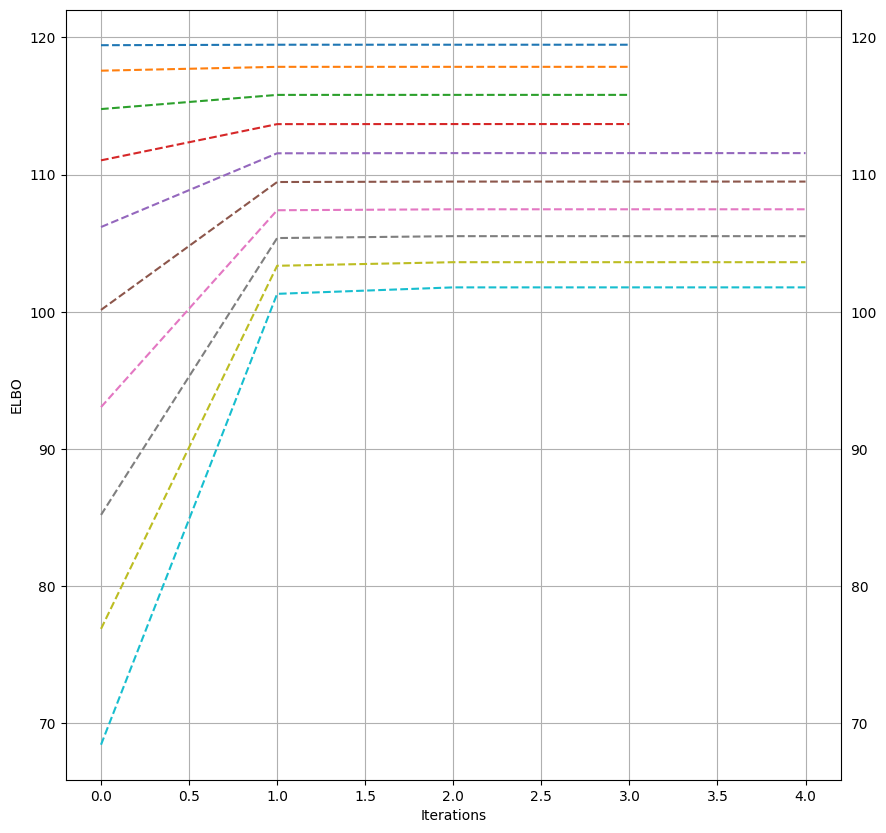

In [57]:
nb_iter_max = 10
a0, b0, c0, d0 = np.linspace(10**(-2),1e-1,10), np.linspace(10**(-4),1e-1,10), np.linspace(10**(-2),1e-1,10), np.array([10**(-4) for k in range(D)])
for _ in range(10):
    # Initialization
    a, b, c, d = a0[_], b0[_], c0[_], d0
    elbos,beta,a,b,c,d,V,test= CAVI_complet(X, Y, a, b, c, d, max_iter = 500, eps = 1e-5)

    nb_iter = np.array(elbos).size
    if nb_iter>nb_iter_max:
        nb_iter_max = nb_iter
    plt.figure(0, figsize=(10,10))
    plt.plot(np.array(elbos[2::]), '--')
    plt.tick_params(labelright=True)
    plt.grid(True)
    plt.xlabel('Iterations')
    plt.ylabel('ELBO')
